In [295]:
import scipy.io
import csv
import numpy as np
import random
import matplotlib.pyplot as plt

In [296]:
# Load .mat file
mat = scipy.io.loadmat(r'C:\Users\Prajyot\Desktop\accidents.mat')

# Specify the variable name to convert to CSV
variable_name1 = 'hwyheaders'
variable_name2 = 'hwydata'
variable_name3 = 'statelabel'
# Get the data from the loaded .mat file
data1 = mat[variable_name1]
data2 = mat[variable_name2]
data3 = mat[variable_name3]
combined_data = list(zip(data3.flatten(), data2.flatten()))

# Specify the CSV file name
csv_file = 'data.csv'

# Write the data to CSV
with open(csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    #for row in data1:
    #    csvwriter.writerow(row)
    for idx, row in enumerate(data2):
        col = data3[idx]
        #print(col)
        #print(row)
    #    row.insert(0,col)
        #csvwriter.writerow(col)
        csvwriter.writerow(row)
    #for row in combined_data:
    #    csvwriter.writerow(row)
    #print(data3)

# Get the data from the loaded .mat file
data8 = mat[variable_name1]

# Print the content of hwyheaders along with index
print("Contents of hwyheaders:")
for idx, header_array in enumerate(data8[0]):
    header = header_array[0]  # Extract the header from the inner array
    print(f"Index {idx}: {header}")

Contents of hwyheaders:
Index 0: Census ID
Index 1: Centroid Longitude
Index 2: Centroid Latitude
Index 3: Traffic fatalities
Index 4: Licensed drivers (thousands)
Index 5: Registered vehicles (thousands)
Index 6: Vehicle-miles traveled (millions)
Index 7: Miles traveled per vehicle
Index 8: Fatalities per 100K licensed drivers
Index 9: Fatalities per 100K registered vehicles
Index 10: Fatalities per 100M vehicle-miles traveled
Index 11: Fatalities involving high blood alcohol
Index 12: Percent Alcohol-Related
Index 13: Total Population
Index 14: Urban Population
Index 15: Rural Population
Index 16: Pct Urban Population


In [297]:
#Reading Data from .csv file
with open('data.csv', 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

data_array = np.array(data,dtype=np.float32)
#print(data_array.shape)
#print(data_array)

# Function to shuffle data and produce training and test data with labels
def train_n_test_data(arr, x,indep_ls, dep_ls):
    dep_arr = arr[:,indep_ls]
    labels_arr = arr[:,dep_ls]
    arr_shape = arr.shape
    train = int(x*arr_shape[0])
    idx = np.random.randint(low=0, high=51, size=51, dtype=int)
    new_arr = dep_arr[idx]
    new_lbs = labels_arr[idx]
    train_arr = new_arr[0:train]
    test_arr = new_arr[train:]
    train_lb = new_lbs[0:train]
    test_lb = new_lbs[train:]
    return train_arr, train_lb, test_arr, test_lb


#Function to perform Linear Regression by Pseudo-Inverse Method
def pseudo_inverse(train_arr, train_lb, test_arr, test_lb):

  y = train_lb
  (a,b) = train_arr.shape

  # Add a column of ones to X for the intercept term
  X_b = np.c_[np.ones((a, 1)), train_arr]

  # Calculate the coefficients using the pseudo-inverse method
  theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

  # Print the coefficients
  for idx in range(len(theta)):
    if idx==0:
      print("Intercept:", theta[0])
    else:
      print(f"Slope{idx}:", theta[idx])

  # Make predictions
  (c,d) = test_arr.shape
  X_b_test = np.c_[np.ones((c,1)),test_arr]
  y_pred = X_b_test.dot(theta)

  return y_pred

#Function to perform Linear Regression by Gradient Descent Method
def grad_des(train_arr, train_lb, test_arr, test_lb):

  # Add a column of ones to X for the intercept term
  y = train_lb
  (a,b) = train_arr.shape

  # Add a column of ones to X for the intercept term
  X_b = np.c_[np.ones((a, 1)), train_arr]
  
    #Normalizing every independent variable columns to prevent exploding gradient
  for idx in range(1,b+1):
    X_b[:,idx] = X_b[:,idx]/np.max(X_b[:,idx])

    # Normalizing every independent variable columns to prevent exploding gradient
#   for idx in range(1, b + 1):
#     mean = np.mean(X_b[:, idx])
#     std = np.std(X_b[:, idx])
#     X_b[:, idx] = (X_b[:, idx] - mean) / std


  # Hyperparameters for gradient descent
  learning_rate = 0.001
  n_iterations = 1000
  loss_ls = []
    
  # Initialize coefficients randomly
  theta = np.random.randn(b+1, 1)

  # Gradient Descent
  for iteration in range(n_iterations):
      gradients = -2 * X_b.T.dot(y - X_b.dot(theta))
      loss = np.square(y - X_b.dot(theta))
      norm_loss = np.sum(loss)/np.max(loss)
      loss_ls.append(norm_loss)
      theta -= learning_rate * gradients

  # Print the coefficients
  for idx in range(len(theta)):
    if idx==0:
      print("Intercept:", theta[0][0])
    else:
      print(f"Slope{idx}:", theta[idx][0])

  # Make predictions
  y_pred = X_b.dot(theta)

  (c,d) = test_arr.shape
  X_b_test = np.c_[np.ones((c,1)),test_arr]
  #Normalizing every independent variable columns to prevent exploding gradient
  for idx in range(1,d+1):
    X_b_test[:,idx] = X_b_test[:,idx]/np.max(X_b_test[:,idx])

  y_pred = X_b_test.dot(theta)

  return y_pred, loss_ls

In [298]:
train_arr1, train_lb1, test_arr1, test_lb1 = train_n_test_data(data_array,0.8,[5,8,11],[3]) 
print("Training data size: ",train_arr.shape)
print("Training label size: ",train_lb.shape)
print("Testing data size: ",test_arr.shape)
print("Testing label size: ",test_lb.shape)

Training data size:  (40, 4)
Training label size:  (40, 1)
Testing data size:  (11, 4)
Testing label size:  (11, 1)


In [288]:
# Applying the pseudo inverse method 
y_pred_pi1 = pseudo_inverse(train_arr1, train_lb1, test_arr1, test_lb1)

Intercept: [-260.21600448]
Slope1: [0.05711882]
Slope2: [15.06968275]
Slope3: [1.77399407]


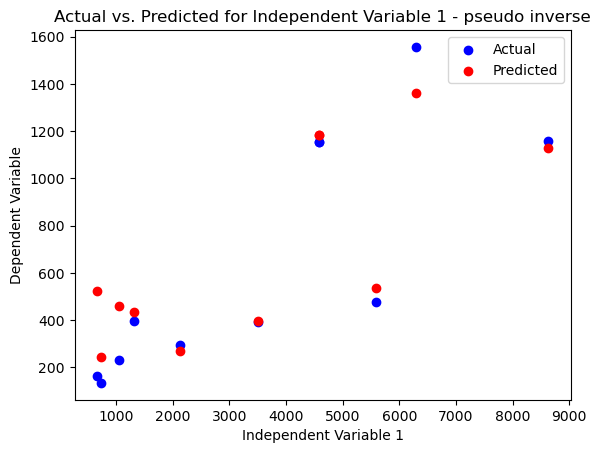

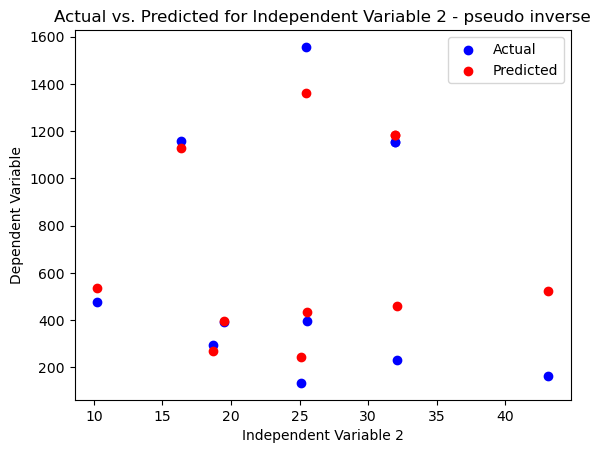

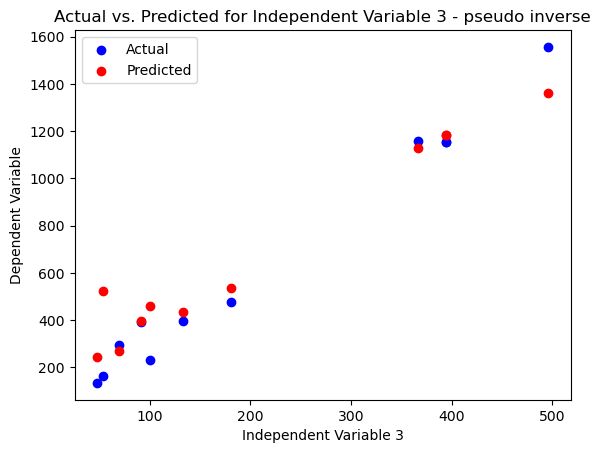

In [289]:
# Plot the results
for i in range(3):  # Assuming you have 4 independent variables (adjust this accordingly)
    plt.figure()
    plt.scatter(test_arr1[:, i], test_lb1, color='blue', label='Actual')
#     y_pred_test = pseudo_inverse(train_arr, train_lb, test_arr, test_lb, tol)
    plt.scatter(test_arr1[:, i], y_pred_pi1, color='red', label='Predicted')
    plt.xlabel(f'Independent Variable {i + 1}')
    plt.ylabel('Dependent Variable')
    plt.title(f'Actual vs. Predicted for Independent Variable {i + 1} - pseudo inverse')
    plt.legend()
    plt.show()

Intercept: -212.0486415205707
Slope1: 587.433454812443
Slope2: 434.4043655287781
Slope3: 967.9054925241073
Gradient Descent


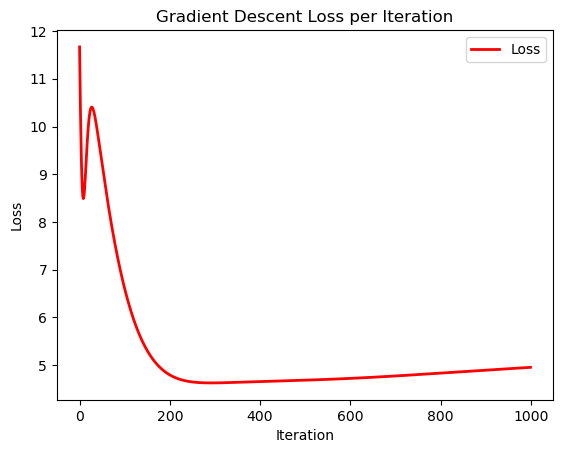

In [290]:
# Applying the gradient descent method
y_pred_gd1, loss_ls_gd1 = grad_des(train_arr1, train_lb1, test_arr1, test_lb1)

print("Gradient Descent")

#Plot the loss
# plt.scatter(X, y, color='blue', label='Actual')
X = np.arange(len(loss_ls_gd1))
plt.plot(X, loss_ls_gd1, color='red', linewidth=2, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss per Iteration')
plt.legend()
plt.show()


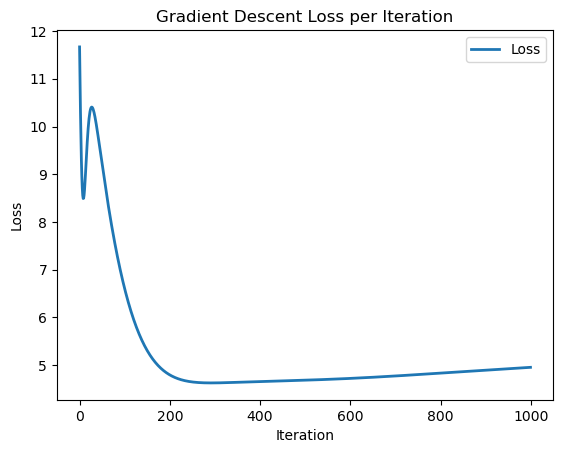

In [292]:
#Plot the loss
# plt.scatter(X, y, color='blue', label='Actual')
X = np.arange(len(loss_ls_gd1))
plt.plot(X, loss_ls_gd1, linewidth=2, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss per Iteration')
plt.legend()
plt.show()

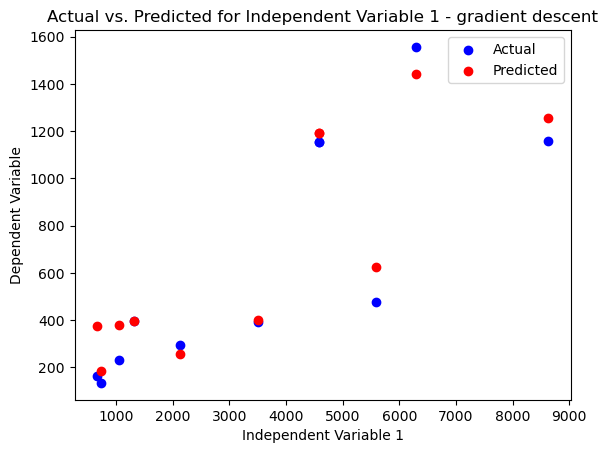

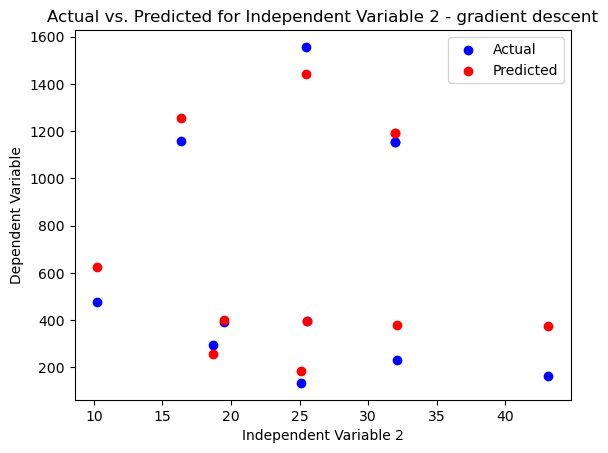

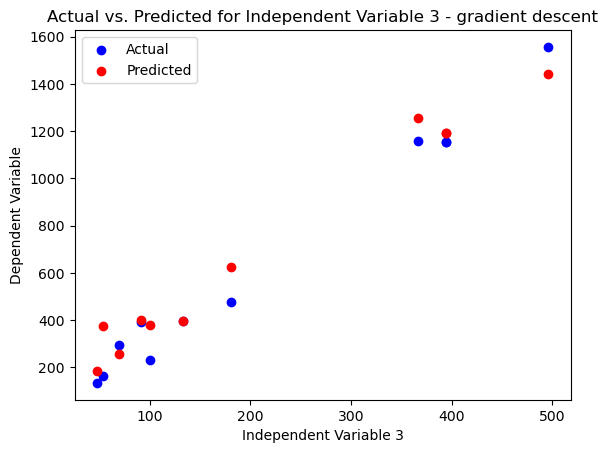

In [291]:
# Plot the results
for i in range(3):  # Assuming you have 4 independent variables (adjust this accordingly)
    plt.figure()
    plt.scatter(test_arr1[:, i], test_lb1, color='blue', label='Actual')
#     y_pred_test = pseudo_inverse(train_arr, train_lb, test_arr, test_lb, tol)
    plt.scatter(test_arr1[:, i], y_pred_gd1, color='red', label='Predicted')
    plt.xlabel(f'Independent Variable {i + 1}')
    plt.ylabel('Dependent Variable')
    plt.title(f'Actual vs. Predicted for Independent Variable {i + 1} - gradient descent')
    plt.legend()
    plt.show()

In [271]:
train_arr2, train_lb2, test_arr2, test_lb2 = train_n_test_data(data_array,0.8,[4],[3])
print("Training data size: ",train_arr.shape)
print("Training label size: ",train_lb.shape)
print("Testing data size: ",test_arr.shape)
print("Testing label size: ",test_lb.shape)

Training data size:  (40, 4)
Training label size:  (40, 1)
Testing data size:  (11, 4)
Testing label size:  (11, 1)


In [272]:
# Applying the pseudo inverse method
y_pred_pi2 = pseudo_inverse(train_arr2, train_lb2, test_arr2, test_lb2)

Intercept: [113.52256536]
Slope1: [0.19564839]


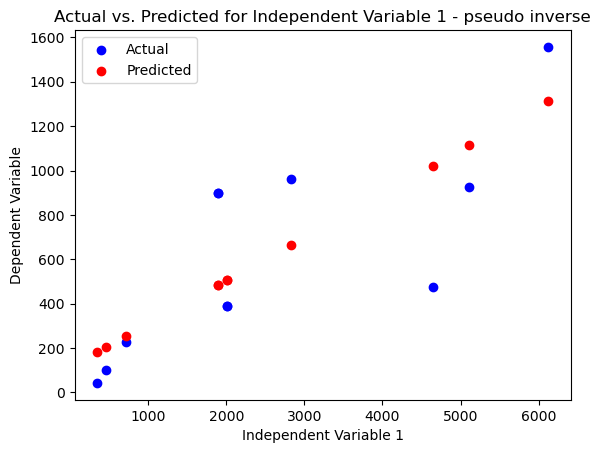

In [273]:
# Plotting the graphs as scatter plots
for i in range(1):  # Assuming 1 independent variable
    plt.figure()
    plt.scatter(test_arr2[:, i], test_lb2, color='blue', label='Actual')
#     y_pred_test = pseudo_inverse(train_arr, train_lb, test_arr, test_lb, tol)
    plt.scatter(test_arr2[:, i], y_pred_pi2, color='red', label='Predicted')
    plt.xlabel(f'Independent Variable {i + 1}')
    plt.ylabel('Dependent Variable')
    plt.title(f'Actual vs. Predicted for Independent Variable {i + 1} - pseudo inverse')
    plt.legend()
    plt.show()

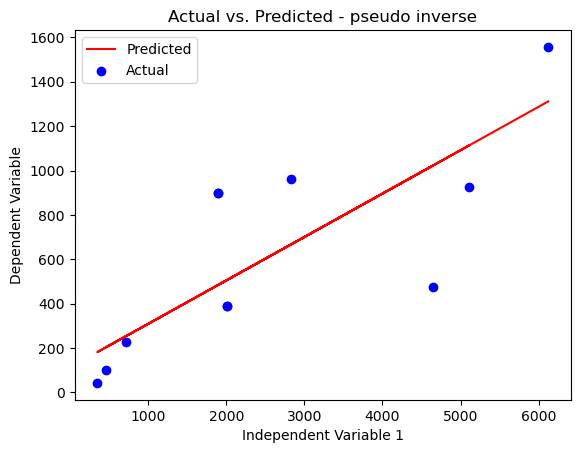

In [274]:
# Plotting the graphs as line plot for the predictions
for i in range(1):  # Assuming 1 independent variable
    plt.figure()
    plt.plot(test_arr2[:, i], y_pred_pi2, color='red', label='Predicted')
    plt.scatter(test_arr2[:, i], test_lb2, color='blue', label='Actual')
    plt.xlabel(f'Independent Variable {i + 1}')
    plt.ylabel('Dependent Variable')
    plt.title(f'Actual vs. Predicted - pseudo inverse')
    plt.legend()
    plt.show()

Intercept: 0.06947526470554315
Slope1: 1.3466301925571897
Gradient Descent


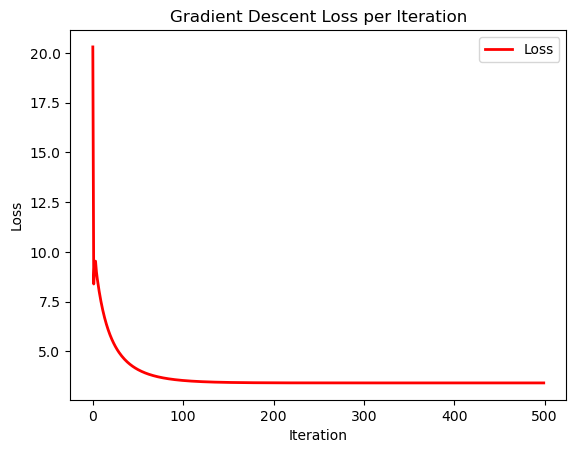

In [275]:
train_lb2 = train_lb2/np.max(train_lb2)
test_lb2 = test_lb2/np.max(test_lb2)
# Applying the gradient descent method
y_pred_gd2, loss_ls_gd2 = grad_des(train_arr2, train_lb2, test_arr2, test_lb2)

print("Gradient Descent")

#Plot the loss
X = np.arange(len(loss_ls_gd2))
plt.plot(X, loss_ls_gd2, color='red', linewidth=2, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss per Iteration')
plt.legend()
plt.show()

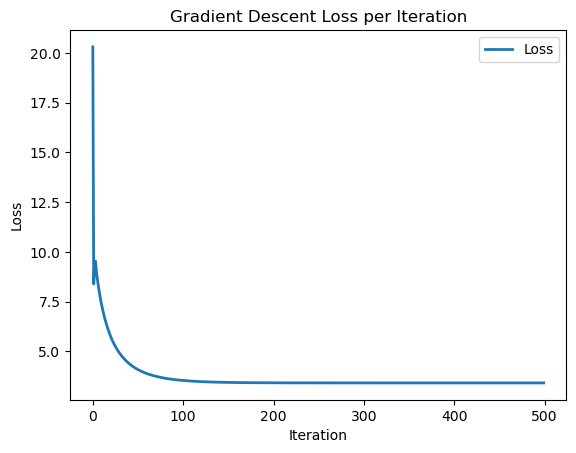

In [293]:
#Plot the loss
X = np.arange(len(loss_ls_gd2))
plt.plot(X, loss_ls_gd2, linewidth=2, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss per Iteration')
plt.legend()
plt.show()

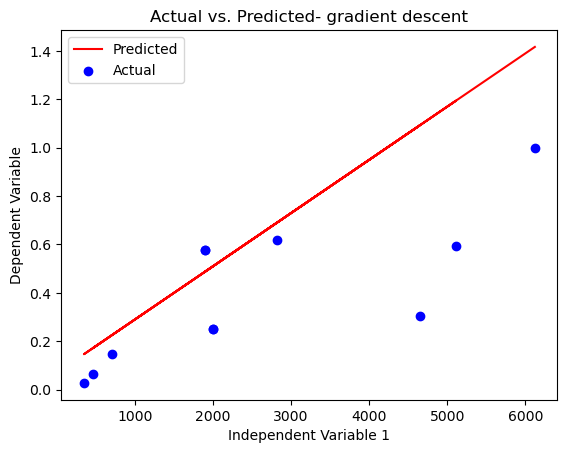

In [294]:
# Plotting the graphs as line plot for the predictions
for i in range(1):  # Assuming 1 independent variable
    plt.figure()
    plt.plot(test_arr2[:, i], y_pred_gd2, color='red', label='Predicted')
    plt.scatter(test_arr2[:, i], test_lb2, color='blue', label='Actual')
    plt.xlabel(f'Independent Variable {i + 1}')
    plt.ylabel('Dependent Variable')
    plt.title(f'Actual vs. Predicted- gradient descent')
    plt.legend()
    plt.show()